# Exercise: To improve data visualisation using Seaborn, MatplotLib

Desired Result: 
1. Obtain Trends/Correlations to build a preliminary model
2. Identify opportunities for Feature Engineering
3. Validate Feature Engineering

Define Problem: To predict sales price accurately.

## Process:
## Exploratory Analysis --> Data Churning --> Data Modelling --> Prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import matplotlib.pyplot as plt

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import seaborn as sns
print("seaborn-learn version: {}". format(sns.__version__))


#misc libraries
import random
import time


Python version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.22.0
matplotlib version: 2.1.2
NumPy version: 1.14.0
SciPy version: 1.0.0
IPython version: 6.2.1
scikit-learn version: 0.19.1
seaborn-learn version: 0.8.1


In [2]:
#Import raw training and validation data, and keep copy of training data
data_raw = pd.read_csv("train.csv")
data_val = pd.read_csv("test.csv")
data_raw_copy = data_raw.copy(deep = True)

data_cleaner = [data_raw, data_val]

#Preview Data
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
#Sample Data

print(data_raw.sample(10))

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1102  1103          20       RL         70.0     7000   Pave   NaN      Reg   
1403  1404          20       RL         49.0    15256   Pave   NaN      IR1   
1291  1292         160       RM         21.0     1680   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
409    410          60       FV         85.0    10800   Pave   NaN      Reg   
1426  1427          60       RL         81.0    10944   Pave   NaN      IR1   
83      84          20       RL         80.0     8892   Pave   NaN      IR1   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
1317  1318         120       FV         47.0     4230   Pave  Pave      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1102         Lvl    AllPub    ...            0    NaN  

In [ ]:
Response Variable:
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

## Let us visualise the input variables and try to understand further one by one.


### Building Class & Zoning Variables:
MSSubClass: The building class - Categorical. 
MSZoning: The general zoning classification - Categorical. 

### Questions:
1. Which classes are the most common? 
> Houses zoned as RL are the most common followed by RM, FV, then RH and C. <br>
Houses classified as 20, 60, 50, 120 and 160 are the most common. <br>
    1. 20: 1-STORY 1946 & NEWER
    2. 60: 2-STORY 1946 & NEWER
    3. 50: 1-1/2 STORY FINISHED
    4. 120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    5. 160: 2-STORY PUD - 1946 & NEWER
    
2. Which classes are the most expensive?
    >  1. MSSubClass
        1. 60: 2-STORY 1946 & NEWER
        2. 120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
        3. 75: 2-1/2 STORY ALL AGES
        4. 20: 1-STORY 1946 & NEWER
        5. 80: SPLIT OR MULTI-LEVEL
    >  2. MSZoning
        1. FV (Floating Vollage)
        2. RL (Residential Low Density)
        3. RL (Residential High Density)
        4. RL (Residential Medium Density)
        5. Commercial

3. Is there a relationship between Housing Price and

3. What is the relationship between MSSubClass and MSZoning?
> Based on the Crosstab, we take note that: <br>
Houses zoned under FV only has 20, 60, 120, and 160 building classes.

### Conclusion:
Hypothesis 1: Both MSSubClass and MSZoning jointly affects the SalePrice.

MSSubClass has values of: 
[ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190]
MSSubZone has values of: 
['C (all)' 'FV' 'RH' 'RL' 'RM']


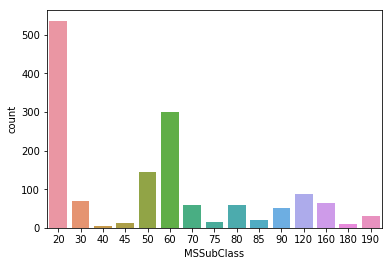

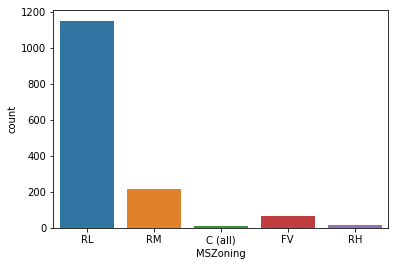

                     mean  size
MSSubClass                     
60          239948.501672   299
120         200779.080460    87
75          192437.500000    16
20          185224.811567   536
80          169736.551724    58
70          166772.416667    60
40          156125.000000     4
85          147810.000000    20
50          143302.972222   144
160         138647.380952    63
90          133541.076923    52
190         129613.333333    30
45          108591.666667    12
180         102300.000000    10
30           95829.724638    69
  MSZoning      SalePrice
1       FV  214014.061538
3       RL  191004.994787
2       RH  131558.375000
4       RM  126316.830275
0  C (all)   74528.000000


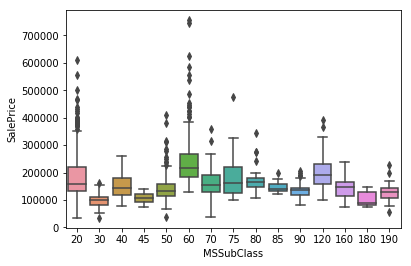

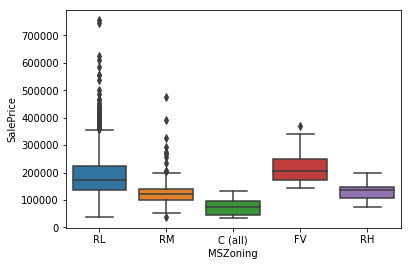

MSZoning    C (all)  FV  RH   RL  RM
MSSubClass                          
20                2  13   3  508  10
30                2   0   1   33  33
40                0   0   0    2   2
45                0   0   1    4   7
50                4   0   1   88  51
60                0  25   0  273   1
70                1   0   3   30  26
75                0   0   0    6  10
80                0   0   0   58   0
85                0   0   0   20   0
90                0   0   3   43   6
120               0   5   2   59  21
160               0  22   0   11  30
180               0   0   0    0  10
190               1   0   2   16  11
                              mean  size
MSZoning MSSubClass                     
FV       60          248558.600000    25
RL       60          239544.457875   273
FV       20          226289.538462    13
         120         226140.000000     5
RL       120         210029.491525    59
         70          199808.733333    30
RM       75          197050.000000    10
RL

In [10]:
print("MSSubClass has values of: ")
print(format(np.unique(data_raw["MSSubClass"])))
print("MSSubZone has values of: ")
print(np.unique(data_raw["MSZoning"]))

#How are the two variables distributed?
ax = sns.countplot(x="MSSubClass", data=data_raw)
plt.show()

ax2 = sns.countplot(x="MSZoning", data=data_raw)
plt.show()

#Is MSSubClass & MSZoning related to Housing Price?
print(data_raw.groupby(["MSSubClass"], as_index = False)["SalePrice"].aggregate([np.mean, np.size]).sort_values("mean", ascending = False))
print(data_raw.groupby(["MSZoning"], as_index = False)["SalePrice"].mean().sort_values("SalePrice", ascending = False))

sns.boxplot(x = data_raw["MSSubClass"], y = data_raw["SalePrice"])
plt.show()
sns.boxplot(x = data_raw["MSZoning"], y = data_raw["SalePrice"])
plt.show()

#Is MSSubClass related to MSZoning?
print(pd.crosstab(data_raw["MSSubClass"], data_raw["MSZoning"]))

#Does MSZoning related to Housing Price because of MSSubClass?
print(data_raw.groupby(["MSZoning", "MSSubClass"], as_index = False)["SalePrice"].aggregate([np.mean, np.size]).sort_values("mean", ascending = False))


# Analysis of Lot Variables:

Firstly, the variables are divivded into Numerical and Categorical Variables.

## Numerical Variables:
LotFrontage: Linear feet of street connected to property <br>
LotArea: Lot size in square feet

## Categorical Variables:
1. Street: Type of road access - Pave or Gravel
2. Alley: Type of alley access - 
3. LotShape: General shape of property
4. LandContour: Flatness of the property
5. Utilities: Type of utilities available
6. LotConfig: Lot configuration
7. LandSlope: Slope of property
8. Neighborhood: Physical locations within Ames city limits
9. Condition1: Proximity to main road or railroad
10. Condition2: Proximity to main road or railroad (if a second is present)

## Questions to Ask:
1. What values do these variables take?
2. How are they distributed? 
3. Are they correlated to any other variables or our output variable?

## Analysis of Numerical Variables:
LotFrontage: Linear feet of street connected to property. Usually the larger the lot, the more valuable property.
LotArea: Lot size in square feet, Size of Parcel of Land. Larger the lot, we expect property to be more expensive.

### Questions:
1. How is LotSize, LotFrontage data like?
> a) LotFrontage has 59 null entries. We can argue that every lot has a frontage, we need to should fill in these data.

2. Is LotSize, LotFrontage correlated with SalePrice?
> a) LotFrontage does not appear to be correlated to SalePrice. <br>
> b) LotSize appears to have correlation with SalePrice, but there is high noise - i.e. there are some other variables that affects SalePrice to a greater extent.

3. Is LotSize and LotFrontage correlated to one another?
a) There appears to be a correlation between  LotSize and LotFrontage, although there are numerous outliers. This is logical, as LotSize is a function of LotFrontage.

### Conclusions:
The effect of LotSize on SalePrice depends on some other variable(s). We should find out what other factors affects SalePrice.

### Actions Needed:
Fill in LotFrontage based on some method.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
LotFrontage    1201 non-null float64
LotArea        1460 non-null int64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None
 
Variable: LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


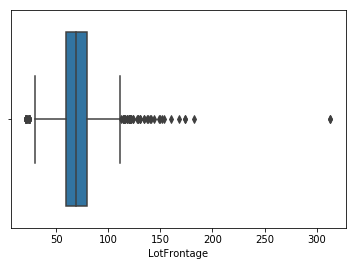

Variable: LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


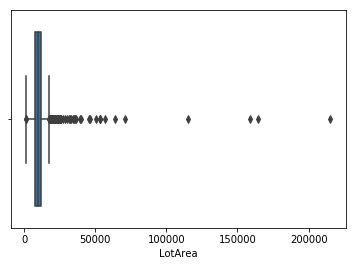

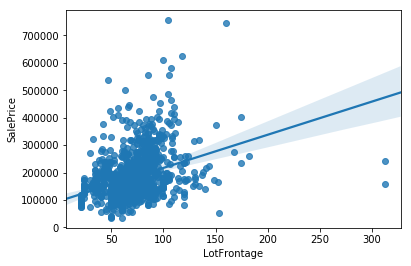

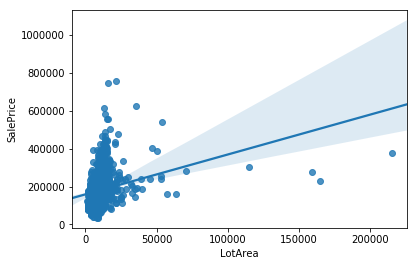

AxesSubplot(0.125,0.125;0.775x0.755)


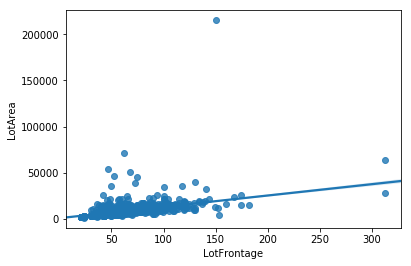

In [5]:
#1. How is LotSize, LotFrontage data like?
lot_variables_numerical = ["LotFrontage", "LotArea"] 

#Check for null variables
print(data_raw[lot_variables_numerical].info())
print(" ")

for i in lot_variables_numerical:
    print("Variable: {}".format(i))
    print(data_raw[i].describe())
    sns.boxplot(x = data_raw[i])
    plt.show()

#2. Is LotSize, LotFrontage correlated with SalePrice?

for i in lot_variables_numerical:
    sns.regplot(x = data_raw[i], y = data_raw["SalePrice"], fit_reg = True)
    plt.show()

#3. Is LotSize and LotFrontage correlated to one another?

print(sns.regplot(x = data_raw["LotFrontage"], y = data_raw["LotArea"], robust = True))

## Analysis of Categorical Lot Variables:

1. Street: Type of road access - Paved or Gravel.
2. Alley: Type of alley access - Paved or Gravel.
3. LotShape: General shape of property
4. LandContour: Flatness of the property
5. Utilities: Type of utilities available
6. LotConfig: Lot configuration
7. LandSlope: Slope of property
8. Neighborhood: Physical locations within Ames city limits
9. Condition1: Proximity to main road or railroad
10. Condition2: Proximity to main road or railroad (if a second is present)

### Questions:
1. How is Street, Alley, etc. data like? <br>
> Street: Type of road access - Paved or Gravel, with Paved houses correlated to higher SalePrice. <br>
> Alley: Type of alley access - Paved or Gravel, with Paved houses correlated to higher SalePrice. <br>
> LotShape: General shape of property - Reg, IR (slightly irregular), IR2 (moderately irregular), IR3 (irregular) <br>
> 

* We note that SalePrice is higher for Irregular Lots. However, this may be due to Irregular Lots being less available. <br>
> LandContour: Flatness of the property  <br>
Utilities: Type of utilities available <br>
LotConfig: Lot configuration <br>
LandSlope: Slope of property <br>
Neighborhood: Physical locations within Ames city limits <br>
Condition1: Proximity to main road or railroad <br>
Condition2: Proximity to main road or railroad (if a second is present) <br>

2. Is LotSize, LotFrontage correlated with SalePrice?
> a) LotFrontage does not appear to be correlated to SalePrice. <br>
b) LotSize appears to have correlation with SalePrice, but there is high noise - i.e. there are some other variables that affects SalePrice to a greater extent. <br>

3. Is LotSize and LotFrontage correlated to one another?
> a) There appears to be a correlation between  LotSize and LotFrontage, although there are numerous outliers. This is logical, as LotSize is a function of LotFrontage. <br>


                 mean  size
Street                     
Pave    181130.538514  1454
Grvl    130190.500000     6
 
                mean  size
Alley                     
Pave   168000.585366    41
Grvl   122219.080000    50
 
                   mean  size
LotShape                     
IR2       239833.365854    41
IR3       216036.500000    10
IR1       206101.665289   484
Reg       164754.818378   925
 
                      mean  size
LandContour                     
HLS          231533.940000    50
Low          203661.111111    36
Lvl          180183.746758  1311
Bnk          143104.079365    63
 
                   mean  size
Utilities                    
AllPub     180950.95682  1459
NoSeWa     137500.00000     1
 
                    mean  size
LotConfig                     
CulDSac    223854.617021    94
FR3        208475.000000     4
Corner     181623.425856   263
FR2        177934.574468    47
Inside     176938.047529  1052
 
                    mean  size
LandSlope             

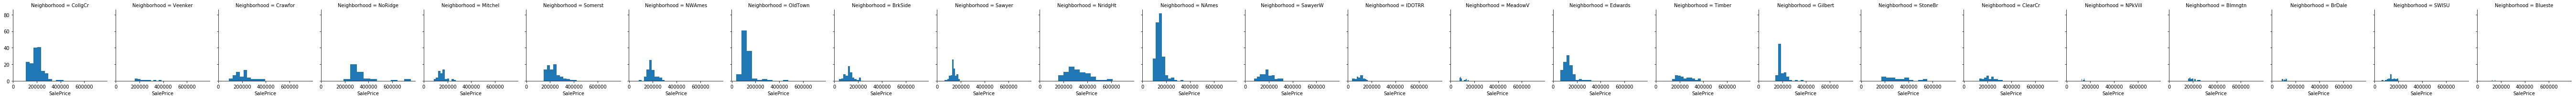

In [46]:
#how does the lot variables (categorical) look like?
lot_variables_categorical = ["Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", 
                "LandSlope", "Neighborhood", "Condition1", "Condition2"]

for i in lot_variables_categorical:
    print(data_raw.groupby([i], as_index=False)["SalePrice"].aggregate([np.mean, np.size]).sort_values("mean", ascending = False))
    print(" ")
    
neighborhood_sorted = (data_raw.groupby(["Neighborhood"], as_index=False)["SalePrice"].aggregate([np.mean, np.size]).sort_values("mean", ascending = False)).index.values

neighborhood_df = pd.DataFrame()


g = sns.FacetGrid(data_raw.loc[:, ("Neighborhood", "SalePrice")], col = "Neighborhood")
g.map(plt.hist, "SalePrice")

#for i in neighborhood_sorted:
#    neighborhood_df = neighborhood_df.append(data_raw.loc[data_raw["Neighborhood"] == i, ["Neighborhood", "SalePrice"]])
    

In [25]:
## Analysis of 

25


Variables related to Dwelling:
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces - Ordinal.
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

In [47]:
data_raw.index

RangeIndex(start=0, stop=1460, step=1)